# Independent Research Project - 200019239

## Analysing crime rate and type in London

### https://github.com/sabimohdnajib/PY4SA_IRP.git

## Part 1: Overall Crime

### Importing libraries, data and plotting the shapefile of London

                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F       NaN   
1               Croydon  E09000008   8649.441       0.000         F       NaN   
2               Bromley  E09000006  15013.487       0.000         F       NaN   
3              Hounslow  E09000018   5658.541      60.755         F       NaN   
4                Ealing  E09000009   5554.428       0.000         F       NaN   
5              Havering  E09000016  11445.735     210.763         F       NaN   
6            Hillingdon  E09000017  11570.063       0.000         F       NaN   
7                Harrow  E09000015   5046.330       0.000         F       NaN   
8                 Brent  E09000005   4323.270       0.000         F       NaN   
9                Barnet  E09000003   8674.837       0.000         F       NaN   

   SUB_2006                                           geometry  
0       NaN  POLYGON ((516401.600 160201.80

Text(0.5, 1.0, 'Figure 1: Map of Greater London with the borough boundaries')

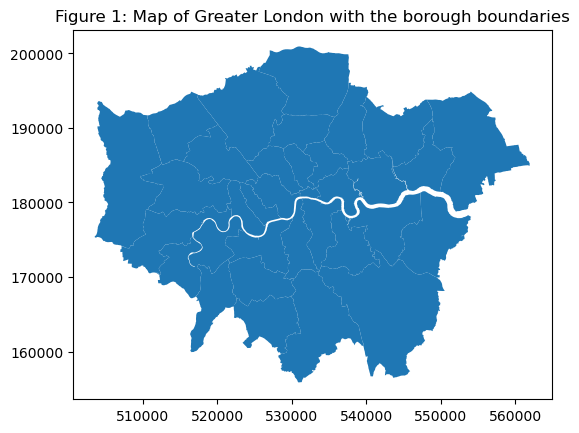

In [39]:
#Importing the libraries
import matplotlib.pyplot as plt
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import contextily as ctx
import seaborn as sns
import numpy as np

#Loading the data
london = gpd.read_file("/Users/sabrinanajib/Documents/PY4SA_IRP/London_Data/London_Borough_Excluding_MHW.shp")
crime = pd.read_csv("/Users/sabrinanajib/Documents/PY4SA_IRP/2023-02/2023-02-metropolitan-street.csv")

#Seeing the data
print(london.head(10))

#Renaming 'NAME' column to 'Borough'
london.rename(columns={'NAME': 'Borough'}, inplace=True)

print(london.head(10))

#Plotting map of london
london_boundaries = london.plot()
london_boundaries.set_title('Figure 1: Map of Greater London with the borough boundaries')

### Turning the Coordinate Reference System (CRS) of the map of London to match the data

EPSG:4326


Text(0.5, 1.0, 'Figure 2: Map of Greater London with the borough boundaries (Longitude and Latitude)')

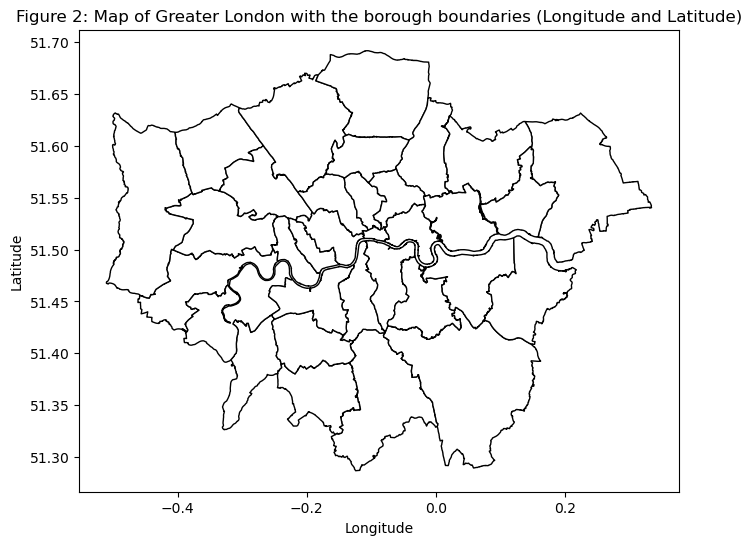

In [43]:
#converting the coordinate reference system (crs) of the london map to match the crime data
london_wgs84 = london.to_crs(epsg=4326)
#checking the new crs
print(london_wgs84.crs)

#Map of london with converted crs to longitude and latitude
london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
london_map.set_xlabel('Longitude')
london_map.set_ylabel('Latitude')
london_map.set_title('Figure 2: Map of Greater London with the borough boundaries (Longitude and Latitude)')

### Exploring the crime data

In [4]:
#Exploring the crime data

#looking at the first 5 data points in the table
first_5 = crime.head(5)
print("The first 5 rows of the crime data")
print(first_5)

#subsetting the crime data to areas within the map
crime_df = crime[(crime['Latitude'] < 51.7) & (crime['Latitude'] > 51.275) & (crime['Longitude'] < 0.35) & (crime['Longitude'] > -0.53)]

#looking at the first 5 data points in the table
crime_5 = crime_df.head(5)
#check the subset
print("The first 5 rows of the crime data within the longitude and latitudes of London")
print(crime_5)

The first 5 rows of the crime data
                                            Crime ID    Month  \
0  9fe856fe19b87ece3f7f21b90c739c9cd1815e6c9e141e...  2023-02   
1                                                NaN  2023-02   
2                                                NaN  2023-02   
3                                                NaN  2023-02   
4                                                NaN  2023-02   

                   Reported by                 Falls within  Longitude  \
0  Metropolitan Police Service  Metropolitan Police Service  -0.272888   
1  Metropolitan Police Service  Metropolitan Police Service   0.140127   
2  Metropolitan Police Service  Metropolitan Police Service   0.142112   
3  Metropolitan Police Service  Metropolitan Police Service   0.140194   
4  Metropolitan Police Service  Metropolitan Police Service   0.134947   

    Latitude                    Location  LSOA code  \
0  50.835486    On or near Queen'S Place  E01031369   
1  51.588913  On or

### Recoding data to add a column for Boroughs

In [5]:
#creating a borough column from crime data that deletes the last 5 digits of the 'LSOA name' column
crime_df["Borough"] = crime_df['LSOA name'].str[:-5]

/var/folders/zg/jw_qspdj65b2ls0920mvbyp40000gp/T/ipykernel_5574/3765673065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df["Borough"] = crime_df['LSOA name'].str[:-5]


### Recoding data to only include the 32 Boroughs of London

In [6]:
#subsetting data from places only within the 32 boroughs
crime_borough = crime_df[(crime_df['Borough'] == 'Westminster') |
                         (crime_df['Borough'] == 'Kensington and Chelsea') |
                         (crime_df['Borough'] == 'Hammersmith and Fulham') |
                         (crime_df['Borough'] == 'Wandsworth') |
                         (crime_df['Borough'] == 'Lambeth') |
                         (crime_df['Borough'] == 'Southwark') |
                         (crime_df['Borough'] == 'Tower Hamlets') |
                         (crime_df['Borough'] == 'Hackney') |
                         (crime_df['Borough'] == 'Islington') |
                         (crime_df['Borough'] == 'Camden') |
                         (crime_df['Borough'] == 'Brent') |
                         (crime_df['Borough'] == 'Ealing') |
                         (crime_df['Borough'] == 'Hounslow') |
                         (crime_df['Borough'] == 'Richmond upon Thames') |
                         (crime_df['Borough'] == 'Kingston upon Thames') |
                         (crime_df['Borough'] == 'Merton') |
                         (crime_df['Borough'] == 'Sutton') |
                         (crime_df['Borough'] == 'Croydon') |
                         (crime_df['Borough'] == 'Bromley') |
                         (crime_df['Borough'] == 'Lewisham') |
                         (crime_df['Borough'] == 'Greenwich') |
                         (crime_df['Borough'] == 'Bexley') |
                         (crime_df['Borough'] == 'Havering') |
                         (crime_df['Borough'] == 'Barking and Dagenham') |
                         (crime_df['Borough'] == 'Redbridge') |
                         (crime_df['Borough'] == 'Newham') |
                         (crime_df['Borough'] == 'Waltham Forest') |
                         (crime_df['Borough'] == 'Haringey') |
                         (crime_df['Borough'] == 'Enfield') |
                         (crime_df['Borough'] == 'Barnet') |
                         (crime_df['Borough'] == 'Harrow') |
                         (crime_df['Borough'] == 'Hillingdon')]

### Plotting a Map of crime in London

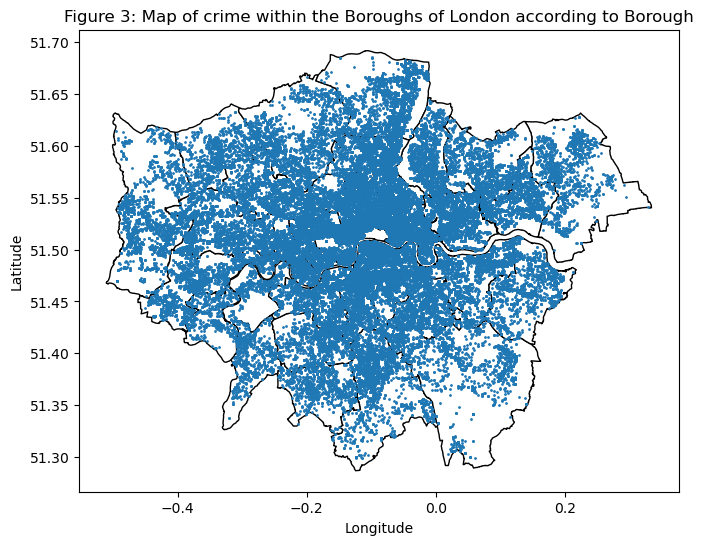

In [7]:
#Creating the map with crime
london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
london_map.set_xlabel('Longitude')
london_map.set_ylabel('Latitude')
london_map.set_title('Figure 3: Map of crime within the Boroughs of London according to Borough')

sp2= plt.plot(crime_borough.Longitude, crime_borough.Latitude, marker='o', linestyle='', markersize=1)
print(sp2)

### Table, Bar chart and Map of crime levels according to Borough

Amount of crime in each Borough
                   Borough  Amount of Crime
0              Westminster             7690
1                   Camden             3555
2            Tower Hamlets             3292
3                   Newham             3264
4                Southwark             3246
5                  Lambeth             3140
6                   Ealing             3067
7                    Brent             2866
8                  Croydon             2860
9                 Haringey             2789
10                 Hackney             2748
11                 Enfield             2719
12                Lewisham             2670
13                  Barnet             2662
14               Islington             2579
15              Hillingdon             2568
16               Greenwich             2450
17                Hounslow             2404
18               Redbridge             2320
19              Wandsworth             2297
20                 Bromley             2100


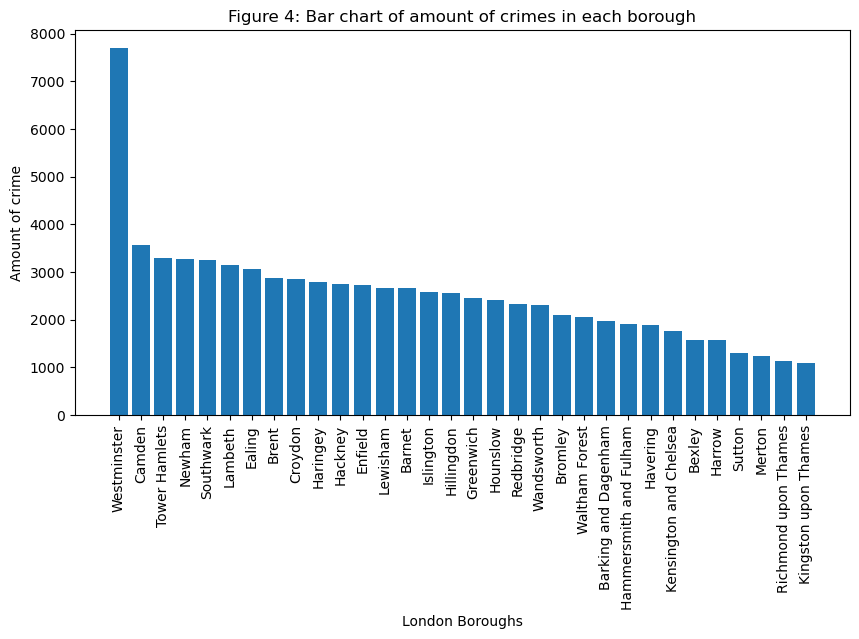

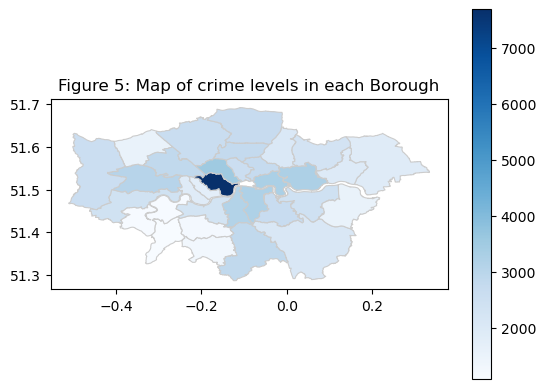

In [114]:
#counting the amount of crime in each Borough
crime_borough_count = crime_borough["Borough"].value_counts().reset_index()
crime_borough_count_column = ['Borough', 'Amount of Crime']
crime_borough_count_df = pd.DataFrame(crime_borough_count)
crime_borough_count_df.columns = crime_borough_count_column

#Table of crime levels according to Borough
print("Amount of crime in each Borough")
print(crime_borough_count_df)

#Bar chart of crime levels according to Borough
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
bar1 = plt.bar(crime_borough_count_df['Borough'], crime_borough_count_df['Amount of Crime'])
plt.title("Figure 4: Bar chart of amount of crimes in each borough")
plt.xlabel("London Boroughs")
plt.ylabel("Amount of crime")

#Map of crime levels in each Borough
crime_borough_map_df = pd.merge(london_wgs84, crime_borough_count_df, on = 'Borough')
fig, ax = plt.subplots()
chol = crime_borough_map_df.plot(column='Amount of Crime', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Figure 5: Map of crime levels in each Borough")
ax.set_aspect('equal')
plt.show()

## Part 2: Types of Crime

### Plotting map of crime according to type

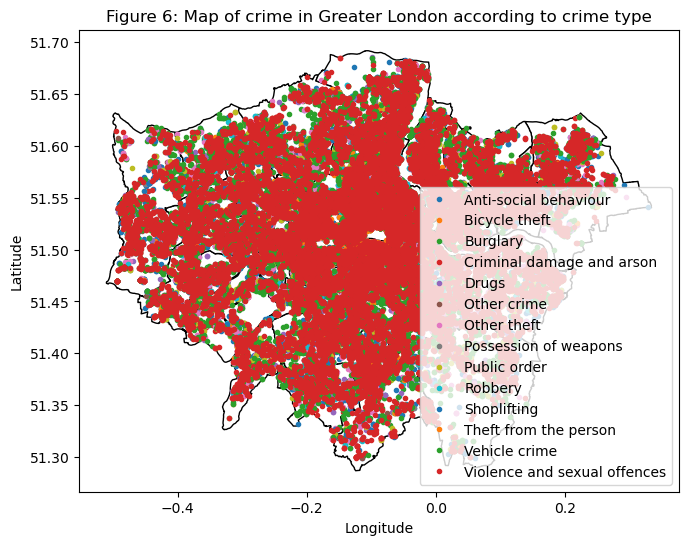

In [48]:
#Creating the map with crime
london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
london_map.set_xlabel('Longitude')
london_map.set_ylabel('Latitude')
london_map.set_title('Figure 6: Map of crime in Greater London according to crime type')

#Plotting the scatterplot on the map
groups = crime_borough.groupby('Crime type')
for name, group in groups:
    sp1= plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=3, label=name)
plt.legend()
print(sp1)

### Table and Bar chart of crime according to type

Amount of crime according to crime type
                      Crime type  Amount of Crime
0   Violence and sexual offences            18787
1          Anti-social behaviour            14521
2                    Other theft             9904
3                  Vehicle crime             8140
4          Theft from the person             5300
5                       Burglary             4434
6                   Public order             4103
7      Criminal damage and arson             4066
8                    Shoplifting             3807
9                          Drugs             2845
10                       Robbery             2615
11                 Bicycle theft             1037
12                   Other crime              852
13         Possession of weapons              358


Text(0, 0.5, 'Amount of crime')

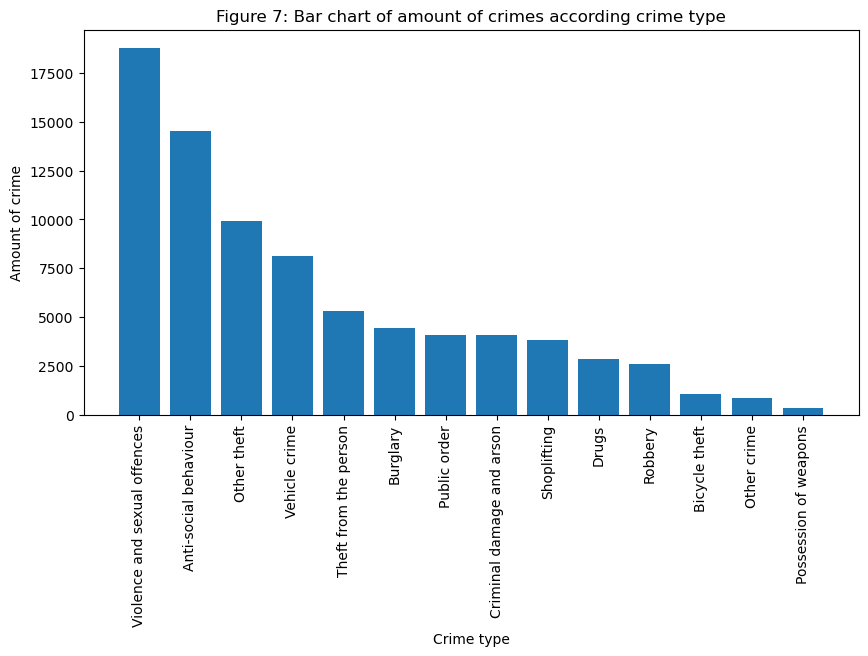

In [50]:
#counting the amount of crime per crime type
crime_type_count = crime_borough["Crime type"].value_counts().reset_index()
crime_type_count_column = ['Crime type', 'Amount of Crime']
crime_type_count_df = pd.DataFrame(crime_type_count)
crime_type_count_df.columns = crime_type_count_column


#table of crime according to type
print("Amount of crime according to crime type")
print(crime_type_count_df)

#bar chart of crime according to type
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
bar2 = plt.bar(crime_type_count_df['Crime type'], crime_type_count_df['Amount of Crime'])
plt.title("Figure 7: Bar chart of amount of crimes according crime type")
plt.xlabel("Crime type")
plt.ylabel("Amount of crime")

### Plotting map of Violence and Sexual Offences

                     index  Borough
0              Westminster      890
1                  Croydon      867
2                   Ealing      792
3                   Newham      778
4            Tower Hamlets      768
5                    Brent      757
6                  Lambeth      726
7                 Lewisham      716
8                Southwark      694
9                Greenwich      694
10                 Enfield      686
11              Hillingdon      647
12                 Hackney      644
13                Hounslow      632
14                  Barnet      623
15               Redbridge      602
16                Haringey      582
17    Barking and Dagenham      568
18              Wandsworth      568
19               Islington      566
20                 Bromley      557
21                  Camden      551
22          Waltham Forest      528
23                  Bexley      525
24                Havering      524
25  Hammersmith and Fulham      430
26                  Harrow  

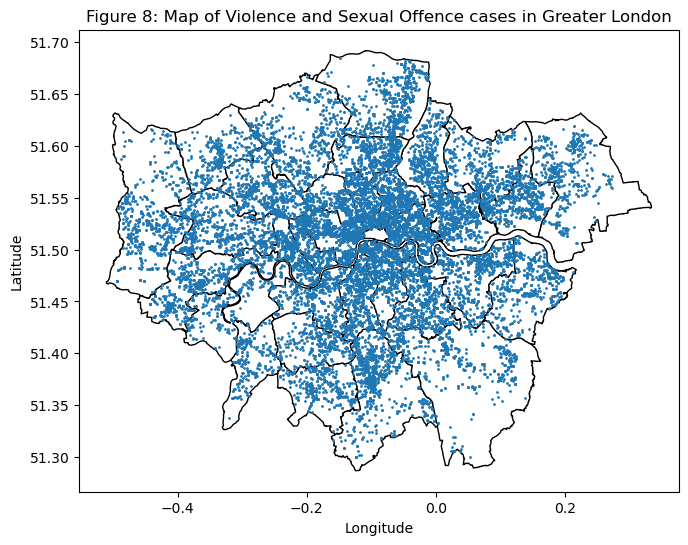

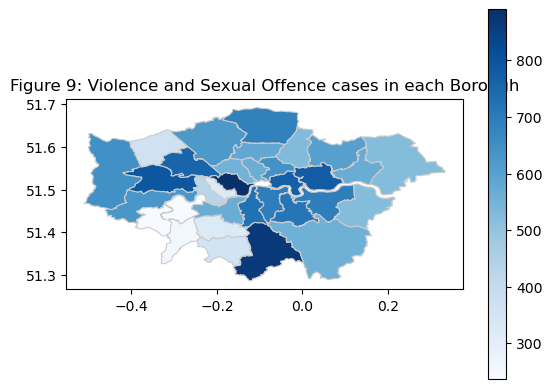

In [56]:
#Creating the map of Violence and Sexual offences
violence_and_so = crime_borough[crime_borough['Crime type'] == 'Violence and sexual offences']

london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
london_map.set_xlabel('Longitude')
london_map.set_ylabel('Latitude')
london_map.set_title('Figure 8: Map of Violence and Sexual Offence cases in Greater London')

#plotting the scatterplot on the map
sp4 = plt.plot(violence_and_so.Longitude, violence_and_so.Latitude, marker='o', linestyle='', markersize=1, label=name)
print(sp4)

#counting the amount of violence and sexual offences in each Borough
vandso_borough_count = violence_and_so["Borough"].value_counts().reset_index()
print(vandso_borough_count)

#merging the data set
vandso_borough_count_column = ['Borough', 'Amount of Violence and Sexual Offence Cases']
vandso_borough_count_df = pd.DataFrame(vandso_borough_count)
vandso_borough_count_df.columns = vandso_borough_count_column

#Chloropleth map of violence and sexual offences
chlo_vors = pd.merge(london_wgs84, vandso_borough_count_df, on = 'Borough')
fig, ax = plt.subplots()
chlo_vors.plot(column='Amount of Violence and Sexual Offence Cases', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Figure 9: Violence and Sexual Offence cases in each Borough")
ax.set_aspect('equal')
plt.show()

### Plotting map of Possession of Weapons

                     index  Borough
0              Westminster       32
1                  Lambeth       18
2                  Enfield       18
3                 Lewisham       17
4                    Brent       16
5                  Croydon       16
6                 Haringey       16
7                Southwark       15
8                  Hackney       15
9            Tower Hamlets       14
10              Wandsworth       13
11                  Camden       13
12          Waltham Forest       12
13                Hounslow       12
14               Greenwich       12
15    Barking and Dagenham       11
16  Hammersmith and Fulham       11
17              Hillingdon       10
18               Islington       10
19                  Barnet        9
20                  Ealing        9
21               Redbridge        8
22                  Newham        8
23                  Harrow        8
24                  Sutton        7
25                 Bromley        6
26                Havering  

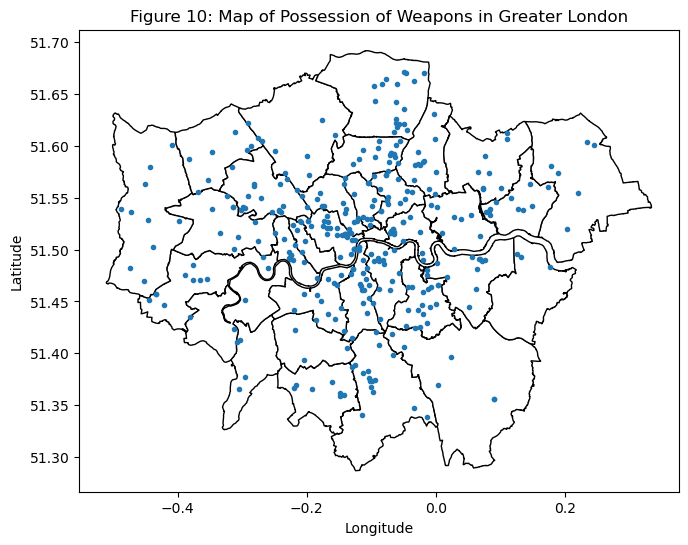

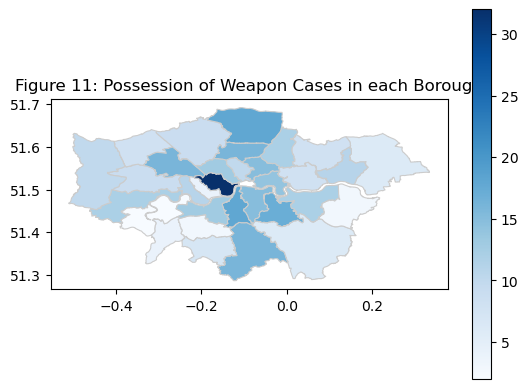

In [58]:
#Creating the map of possession of weapons
pos_weapons = crime_borough[crime_borough['Crime type'] == 'Possession of weapons']

london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
london_map.set_xlabel('Longitude')
london_map.set_ylabel('Latitude')
london_map.set_title('Figure 10: Map of Possession of Weapons in Greater London')

#plotting the scatterplot on the map
sp5 = plt.plot(pos_weapons.Longitude, pos_weapons.Latitude, marker='o', linestyle='', markersize=3, label=name)
print(sp5)

#counting the amount of violence and sexual offences in each Borough
posw_borough_count = pos_weapons["Borough"].value_counts().reset_index()
print(posw_borough_count)

#merging the data set
posw_borough_count_column = ['Borough', 'Amount of Possession of Weapon Cases']
posw_borough_count_df = pd.DataFrame(posw_borough_count)
posw_borough_count_df.columns = posw_borough_count_column

#Chloropleth map of violence and sexual offences
chlo_posw = pd.merge(london_wgs84, posw_borough_count_df, on = 'Borough')
fig, ax = plt.subplots()
chlo_posw.plot(column='Amount of Possession of Weapon Cases', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Figure 11: Possession of Weapon Cases in each Borough")
ax.set_aspect('equal')
plt.show()

### Bar chart of crime in Westminster according to type

Text(0, 0.5, 'Amount of crime')

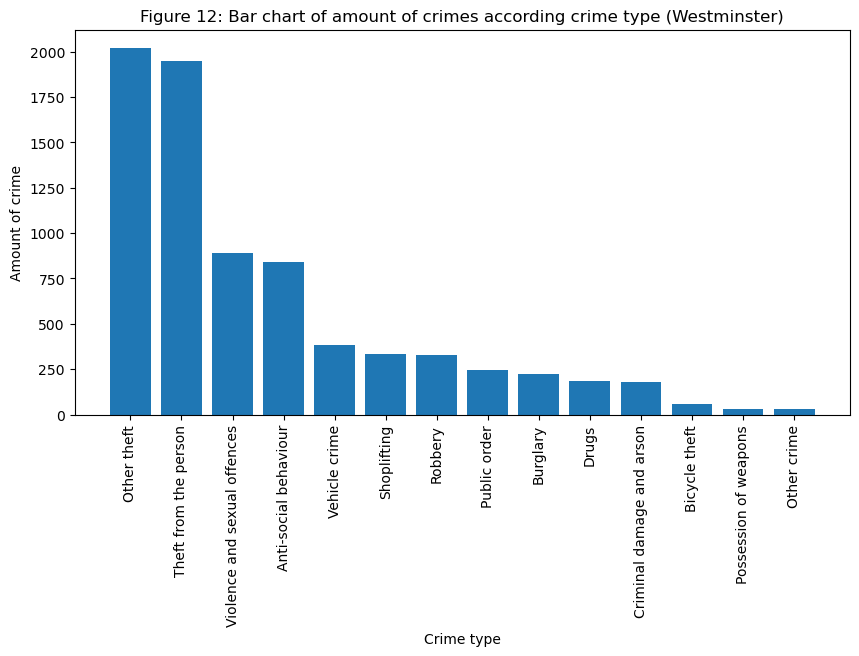

In [59]:
#Creating bar chart on crime types (Westminster)
#subsetting crime that occurred in Westminster
westm = crime_borough[crime_borough['Borough'] == 'Westminster']

#counting the amount of crime per crime type
westm_crime_type_count = westm["Crime type"].value_counts().reset_index()
westm_crime_type_column = ['Crime type', 'Amount of Crime']
westm_crime_type_df = pd.DataFrame(westm_crime_type_count)
westm_crime_type_df.columns = westm_crime_type_column


plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
bar3 = plt.bar(westm_crime_type_df['Crime type'], westm_crime_type_df['Amount of Crime'])
plt.title("Figure 12: Bar chart of amount of crimes according crime type (Westminster)")
plt.xlabel("Crime type")
plt.ylabel("Amount of crime")

### Bar chart of crime in Kingston according to type

Text(0, 0.5, 'Amount of crime')

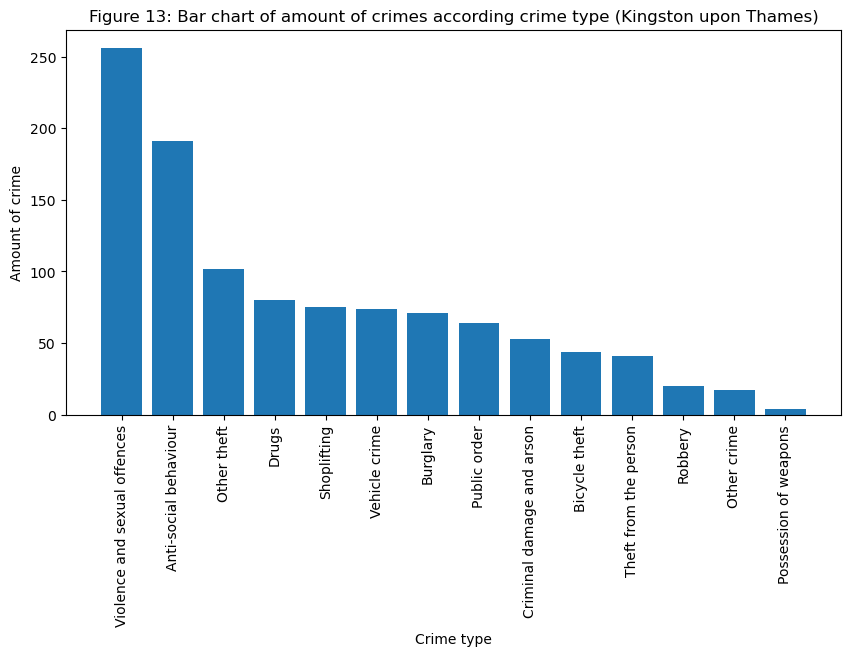

In [117]:
#Creating bar chart on crime types (Kingston)
#subsetting crime that occurred in Kingston
kingst = crime_borough[crime_borough['Borough'] == 'Kingston upon Thames']

#counting the amount of crime per crime type
kingst_crime_type_count = kingst["Crime type"].value_counts().reset_index()
kingst_crime_type_column = ['Crime type', 'Amount of Crime']
kingst_crime_type_df = pd.DataFrame(kingst_crime_type_count)
kingst_crime_type_df.columns = kingst_crime_type_column


plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
bar3 = plt.bar(kingst_crime_type_df['Crime type'], kingst_crime_type_df['Amount of Crime'])
plt.title("Figure 13: Bar chart of amount of crimes according crime type (Kingston upon Thames)")
plt.xlabel("Crime type")
plt.ylabel("Amount of crime")

### Interactive map that shows crime according to types

In [61]:
import ipywidgets as widgets

#Creating options
option = ['Violence and sexual offences',
          'Anti-social behaviour',
          'Other theft',
          'Vehicle crime',
          'Theft from the person',
          'Burglary',
          'Public order',
          'Criminal damage and arson',
          'Shoplifting',
          'Drugs',
          'Robbery',
          'Bicycle theft',
          'Other crime',
          'Possession of weapons']
          
          

#Creating subsets for all crime types
anti_soc_behav = crime_borough[crime_borough['Crime type'] == 'Anti-social behaviour']
oth_theft = crime_borough[crime_borough['Crime type'] == 'Other theft']
veh_crime = crime_borough[crime_borough['Crime type'] == 'Vehicle crime']
person = crime_borough[crime_borough['Crime type'] == 'Theft from the person']
burg = crime_borough[crime_borough['Crime type'] == 'Burglary']
pub_or = crime_borough[crime_borough['Crime type'] == 'Public order']
crim_ars = crime_borough[crime_borough['Crime type'] == 'Criminal damage and arson']
shopl = crime_borough[crime_borough['Crime type'] == 'Shoplifting']
drugs = crime_borough[crime_borough['Crime type'] == 'Drugs']
rob = crime_borough[crime_borough['Crime type'] == 'Robbery']
bic = crime_borough[crime_borough['Crime type'] == 'Bicycle theft']
oth_crime = crime_borough[crime_borough['Crime type'] == 'Other crime']

#Creating the widget
w = widgets.Dropdown(options=option, description='Crime type')

print("Figure 14: Interactive map of crime in London according to type")

#Creating plots based on dropdown menu
def plot_subset(option):
    if option == 'Violence and sexual offences':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(violence_and_so.Longitude, violence_and_so.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Violence and sexual offences in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Anti-social behaviour':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(anti_soc_behav.Longitude, anti_soc_behav.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Anti-social behaviour crime in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Other theft':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(oth_theft.Longitude, oth_theft.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Other theft in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Vehicle crime':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(veh_crime.Longitude, veh_crime.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Vehicle crime in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Theft from the person':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(person.Longitude, person.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Theft from the person in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Burglary':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(burg.Longitude, burg.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Burglary in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Public order':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(pub_or.Longitude, pub_or.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Public order crime in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Criminal damage and arson':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(crim_ars.Longitude, crim_ars.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Criminal damage and arson in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Shoplifting':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(shopl.Longitude, shopl.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Shoplifting in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Drugs':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(drugs.Longitude, drugs.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Drugs in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Robbery':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(rob.Longitude, rob.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Robbery in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Bicycle theft':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(bic.Longitude, bic.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Bicycle theft in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    elif option == 'Other crime':
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(oth_crime.Longitude, oth_crime.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Other crime in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
    else:
        london_map = gpd.plotting.plot_dataframe(london_wgs84,
                                    column=None,
                                    linewidth=1,
                                    edgecolor='black',
                                    facecolor='white',
                                    figsize=(8, 6))
        plt.plot(pos_weapons.Longitude, pos_weapons.Latitude, marker='o', linestyle='', markersize=3, label=name)
        plt.title("Map of Possession of weapons in Greater London")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()

widgets.interactive(plot_subset, option=w)

Figure 14: Interactive map of crime in London according to type


interactive(children=(Dropdown(description='Crime type', options=('Violence and sexual offences', 'Anti-social…

## Part 3: Determinants of crime in London

### Earning vs Crime levels

                   Borough  Amount of Crime  Hourly pay
0              Westminster             7690       21.62
1                   Camden             3555       19.64
2            Tower Hamlets             3292       19.41
3                   Newham             3264       15.63
4                Southwark             3246       18.14
5                  Lambeth             3140       18.31
6                   Ealing             3067       15.91
7                    Brent             2866       15.03
8                  Croydon             2860       16.88
9                 Haringey             2789       16.10
10                 Hackney             2748       16.21
11                 Enfield             2719       14.54
12                Lewisham             2670       16.55
13                  Barnet             2662       16.82
14               Islington             2579       19.64
15              Hillingdon             2568       16.42
16               Greenwich             2450     

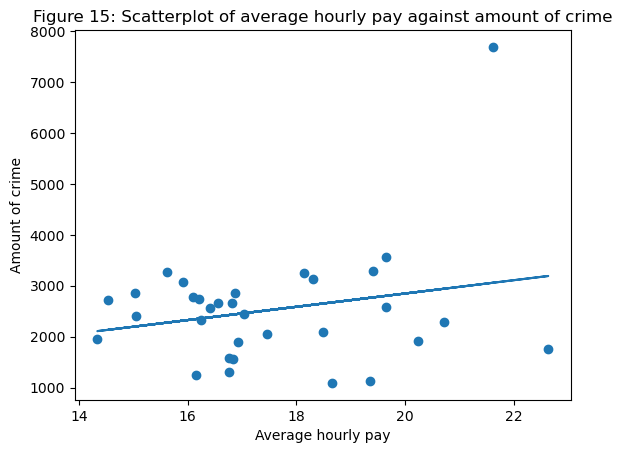

In [74]:
earnings = pd.read_csv("/Users/sabrinanajib/Documents/PY4SA_IRP/Earnings_borough.csv")

earnings_crime = pd.merge(crime_borough_count_df, earnings, on = 'Borough')
print(earnings_crime)

sp6 = plt.scatter(earnings_crime['Hourly pay'], earnings_crime['Amount of Crime'])
plt.title("Figure 15: Scatterplot of average hourly pay against amount of crime")
plt.xlabel("Average hourly pay")
plt.ylabel("Amount of crime")

a, b = np.polyfit(earnings_crime['Hourly pay'], earnings_crime['Amount of Crime'], 1)
plt.plot(earnings_crime['Hourly pay'], a*earnings_crime['Hourly pay']+b)

### Education level vs Crime levels

                   Borough  Amount of Crime  \
0              Westminster             7690   
1                   Camden             3555   
2            Tower Hamlets             3292   
3                   Newham             3264   
4                Southwark             3246   
5                  Lambeth             3140   
6                   Ealing             3067   
7                    Brent             2866   
8                  Croydon             2860   
9                 Haringey             2789   
10                 Hackney             2748   
11                 Enfield             2719   
12                Lewisham             2670   
13                  Barnet             2662   
14               Islington             2579   
15              Hillingdon             2568   
16               Greenwich             2450   
17                Hounslow             2404   
18               Redbridge             2320   
19              Wandsworth             2297   
20           

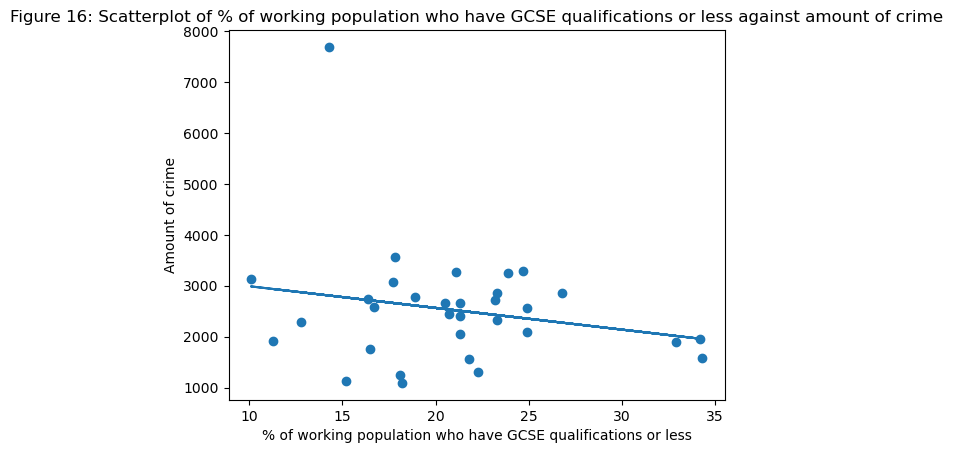

In [76]:
educ = pd.read_csv("/Users/sabrinanajib/Documents/PY4SA_IRP/borough_education.csv")

educ_crime = pd.merge(crime_borough_count_df, educ, on = 'Borough')
print(educ_crime)

sp7 = plt.scatter(educ_crime['% of working age population with GCSE qualifications or less'], educ_crime['Amount of Crime'])
plt.title("Figure 16: Scatterplot of % of working population who have GCSE qualifications or less against amount of crime")
plt.xlabel("% of working population who have GCSE qualifications or less")
plt.ylabel("Amount of crime")

a, b = np.polyfit(educ_crime['% of working age population with GCSE qualifications or less'], educ_crime['Amount of Crime'], 1)
plt.plot(educ_crime['% of working age population with GCSE qualifications or less'], a*educ_crime['% of working age population with GCSE qualifications or less']+b)

### Unemployment vs Crime levels

                   Borough  Amount of Crime  Unemployment rate
0              Westminster             7690                4.0
1                   Camden             3555                4.1
2            Tower Hamlets             3292                4.6
3                   Newham             3264                5.2
4                Southwark             3246                4.8
5                  Lambeth             3140                3.8
6                   Ealing             3067                5.4
7                    Brent             2866                5.8
8                  Croydon             2860                4.8
9                 Haringey             2789                5.1
10                 Hackney             2748                4.6
11                 Enfield             2719                5.8
12                Lewisham             2670                4.5
13                  Barnet             2662                5.4
14               Islington             2579            

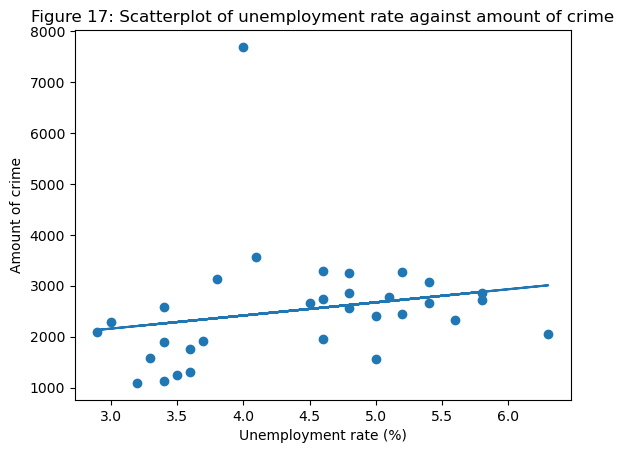

In [64]:
ue = pd.read_csv("/Users/sabrinanajib/Documents/PY4SA_IRP/Unemployment_borough.csv")

ue_crime = pd.merge(crime_borough_count_df, ue, on = 'Borough')
print(ue_crime)

sp8 = plt.scatter(ue_crime['Unemployment rate'], ue_crime['Amount of Crime'])
plt.title("Figure 17: Scatterplot of unemployment rate against amount of crime")
plt.xlabel("Unemployment rate (%)")
plt.ylabel("Amount of crime")

a, b = np.polyfit(ue_crime['Unemployment rate'], ue_crime['Amount of Crime'], 1)
plt.plot(ue_crime['Unemployment rate'], a*ue_crime['Unemployment rate']+b)

### Population vs Crime levels

                   Borough  Amount of Crime  Population
0              Westminster             7690      205087
1                   Camden             3555      210390
2            Tower Hamlets             3292      312273
3                   Newham             3264      350626
4                Southwark             3246      306374
5                  Lambeth             3140      317498
6                   Ealing             3067      366127
7                    Brent             2866      338918
8                  Croydon             2860      390506
9                 Haringey             2789      264130
10                 Hackney             2748      259956
11                 Enfield             2719      329601
12                Lewisham             2670      299810
13                  Barnet             2662      388639
14               Islington             2579      216767
15              Hillingdon             2568      304792
16               Greenwich             2450     

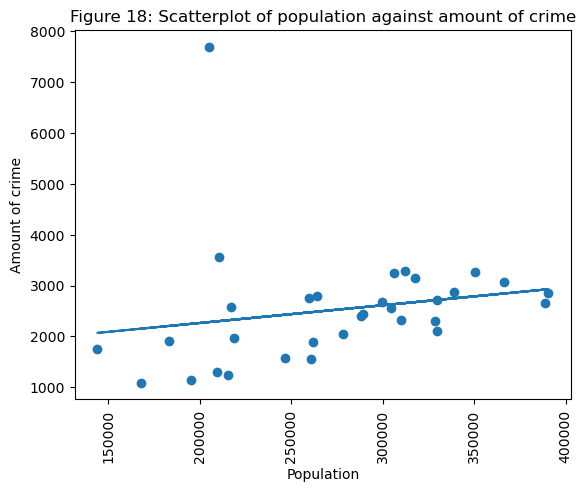

In [125]:
pop = pd.read_csv("/Users/sabrinanajib/Documents/PY4SA_IRP/Borough_population.csv")

pop_crime = pd.merge(crime_borough_count_df, pop, on = 'Borough')
print(pop_crime)

plt.xticks(rotation='vertical')

sp9 = plt.scatter(pop_crime['Population'], pop_crime['Amount of Crime'])
plt.title("Figure 18: Scatterplot of population against amount of crime")
plt.xlabel("Population")
plt.ylabel("Amount of crime")

a, b = np.polyfit(pop_crime['Population'], pop_crime['Amount of Crime'], 1)
plt.plot(pop_crime['Population'], a*pop_crime['Population']+b)

### Interactive map of determinants of crime

In [126]:
from IPython.display import display

#Creating options (Determinants)
option_det = ['Earnings',
          'Education Qualifications',
          'Unemployment',
              'Population']

#Creating the widget
w_det = widgets.Dropdown(options=option_det, description='Determinants')

educ_borough_map_df = pd.merge(london_wgs84, educ_crime, on = 'Borough')
earning_borough_map_df = pd.merge(london_wgs84, earnings, on = 'Borough')
ue_borough_map_df = pd.merge(london_wgs84, ue, on = 'Borough')
pop_borough_map_df = pd.merge(london_wgs84, pop, on = 'Borough')



#Creating the map of determinants of crime based on dropdown menu
def plot_subset(option_det):
    if option_det == 'Earnings':
        fig, ax = plt.subplots()
        earning_borough_map_df.plot(column='Hourly pay', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        plt.title("Hourly pay")
        ax.set_aspect('equal')
        plt.show()
    elif option_det == 'Education Qualifications':
        fig, ax = plt.subplots()
        educ_borough_map_df.plot(column='% of working age population with GCSE qualifications or less', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        plt.title("% who have GCSE qualifications or less")
        ax.set_aspect('equal')
        plt.show()
    elif option_det == 'Population':
        fig, ax = plt.subplots()
        pop_borough_map_df.plot(column='Population', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        plt.title("Population")
        ax.set_aspect('equal')
        plt.show()
    else:
        fig, ax = plt.subplots()
        ue_borough_map_df.plot(column='Unemployment rate', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        plt.title("Unemployment rate (%)")
        ax.set_aspect('equal')
        plt.show()

widgets.interactive(plot_subset, option_det=w_det)

interactive(children=(Dropdown(description='Determinants', options=('Earnings', 'Education Qualifications', 'U…